In [38]:
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

In [39]:
X = [0.04995546, 0.02878598, -0.00712323, 0.01510955, -0.08778622, -0.05025517,
     - 0.09904944, 0.04936974, 0.03271384, -0.01814827, 0.05167898, 0.03520765,
     0.02111619, 0.04719428, 0.03002022, -0.00058276, -0.05902952, -0.14813571,
     -0.03774783, 0.04783216, -0.0081694, -0.04824031]

In [40]:
def scaling_F(ReDP, ReOD, a, b):
    """
    Scaling function is a second degree polynomial
    :param ReDP: design spool speed
    :param ReOD: off-design spool speed
    :return: function value
    """
    return np.array(1 + a * ((ReOD - ReDP) / ReDP) + b * ((ReOD - ReDP) / ReDP) ** 2)


In [41]:
def plot_poly(file_name):
#     GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_GEnx/" + file_name, "rb"))
#     _, All_Reynolds = pickle.load(open("Constants/Reynolds_" + file_name.strip("CEOD_"), "rb"))
    GEnx_OD, GEnx_OD_true, _, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))


#     All_Reynolds = np.array([item for sublist in All_Reynolds for item in sublist])
#     GEnx_OD = np.array([item for sublist in GEnx_OD for item in sublist])
#     GEnx_OD_true = np.array([item for sublist in GEnx_OD_true for item in sublist])
    
    print(All_Reynolds.shape)
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
    print(Re2)
    
    Re25_DP = Re25[0]
    Re19_DP = Re19[0]
    Re3_DP = Re3[0]
    Re49_DP = Re4[0]
    Re5_DP = Re5[0]
    
    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                              [Re25_DP, Re19_DP, Re3_DP],
                              ["Re25", "Re19", "Re3"])):
        SF_pr = scaling_F(re_dp, re_i, X[0 + 6*i], X[1 + 6*i])
#         print(X[0 + 6*i], X[1 + 6*i])
#         print(SF_pr)
        plt.scatter(re_i, SF_pr, label=label)
    plt.title("SF PR")
    plt.legend()
    plt.show()

    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                                  [Re25_DP, Re19_DP, Re3_DP],
                                  ["Re25", "Re19", "Re3"])):
        SF_m = scaling_F(re_dp, re_i, X[2 + 6*i], X[3 + 6*i])
        plt.scatter(re_i, SF_m, label=label)
    plt.title("SF M")
    plt.legend()
    plt.show()

    for i, (re_i, re_dp, label) in enumerate(zip([Re25, Re19, Re3],
                                  [Re25_DP, Re19_DP, Re3_DP],
                                  ["Re25", "Re19", "Re3"])):
        SF_e = scaling_F(re_dp, re_i, X[4 + 6*i], X[5 + 6*i])
        plt.scatter(re_i, SF_e, label=label)
    plt.title("SF e")
    plt.legend()
    plt.show()
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"
# plot_poly(file_name)

(15, 10)
design point Re3 54972344.6784603


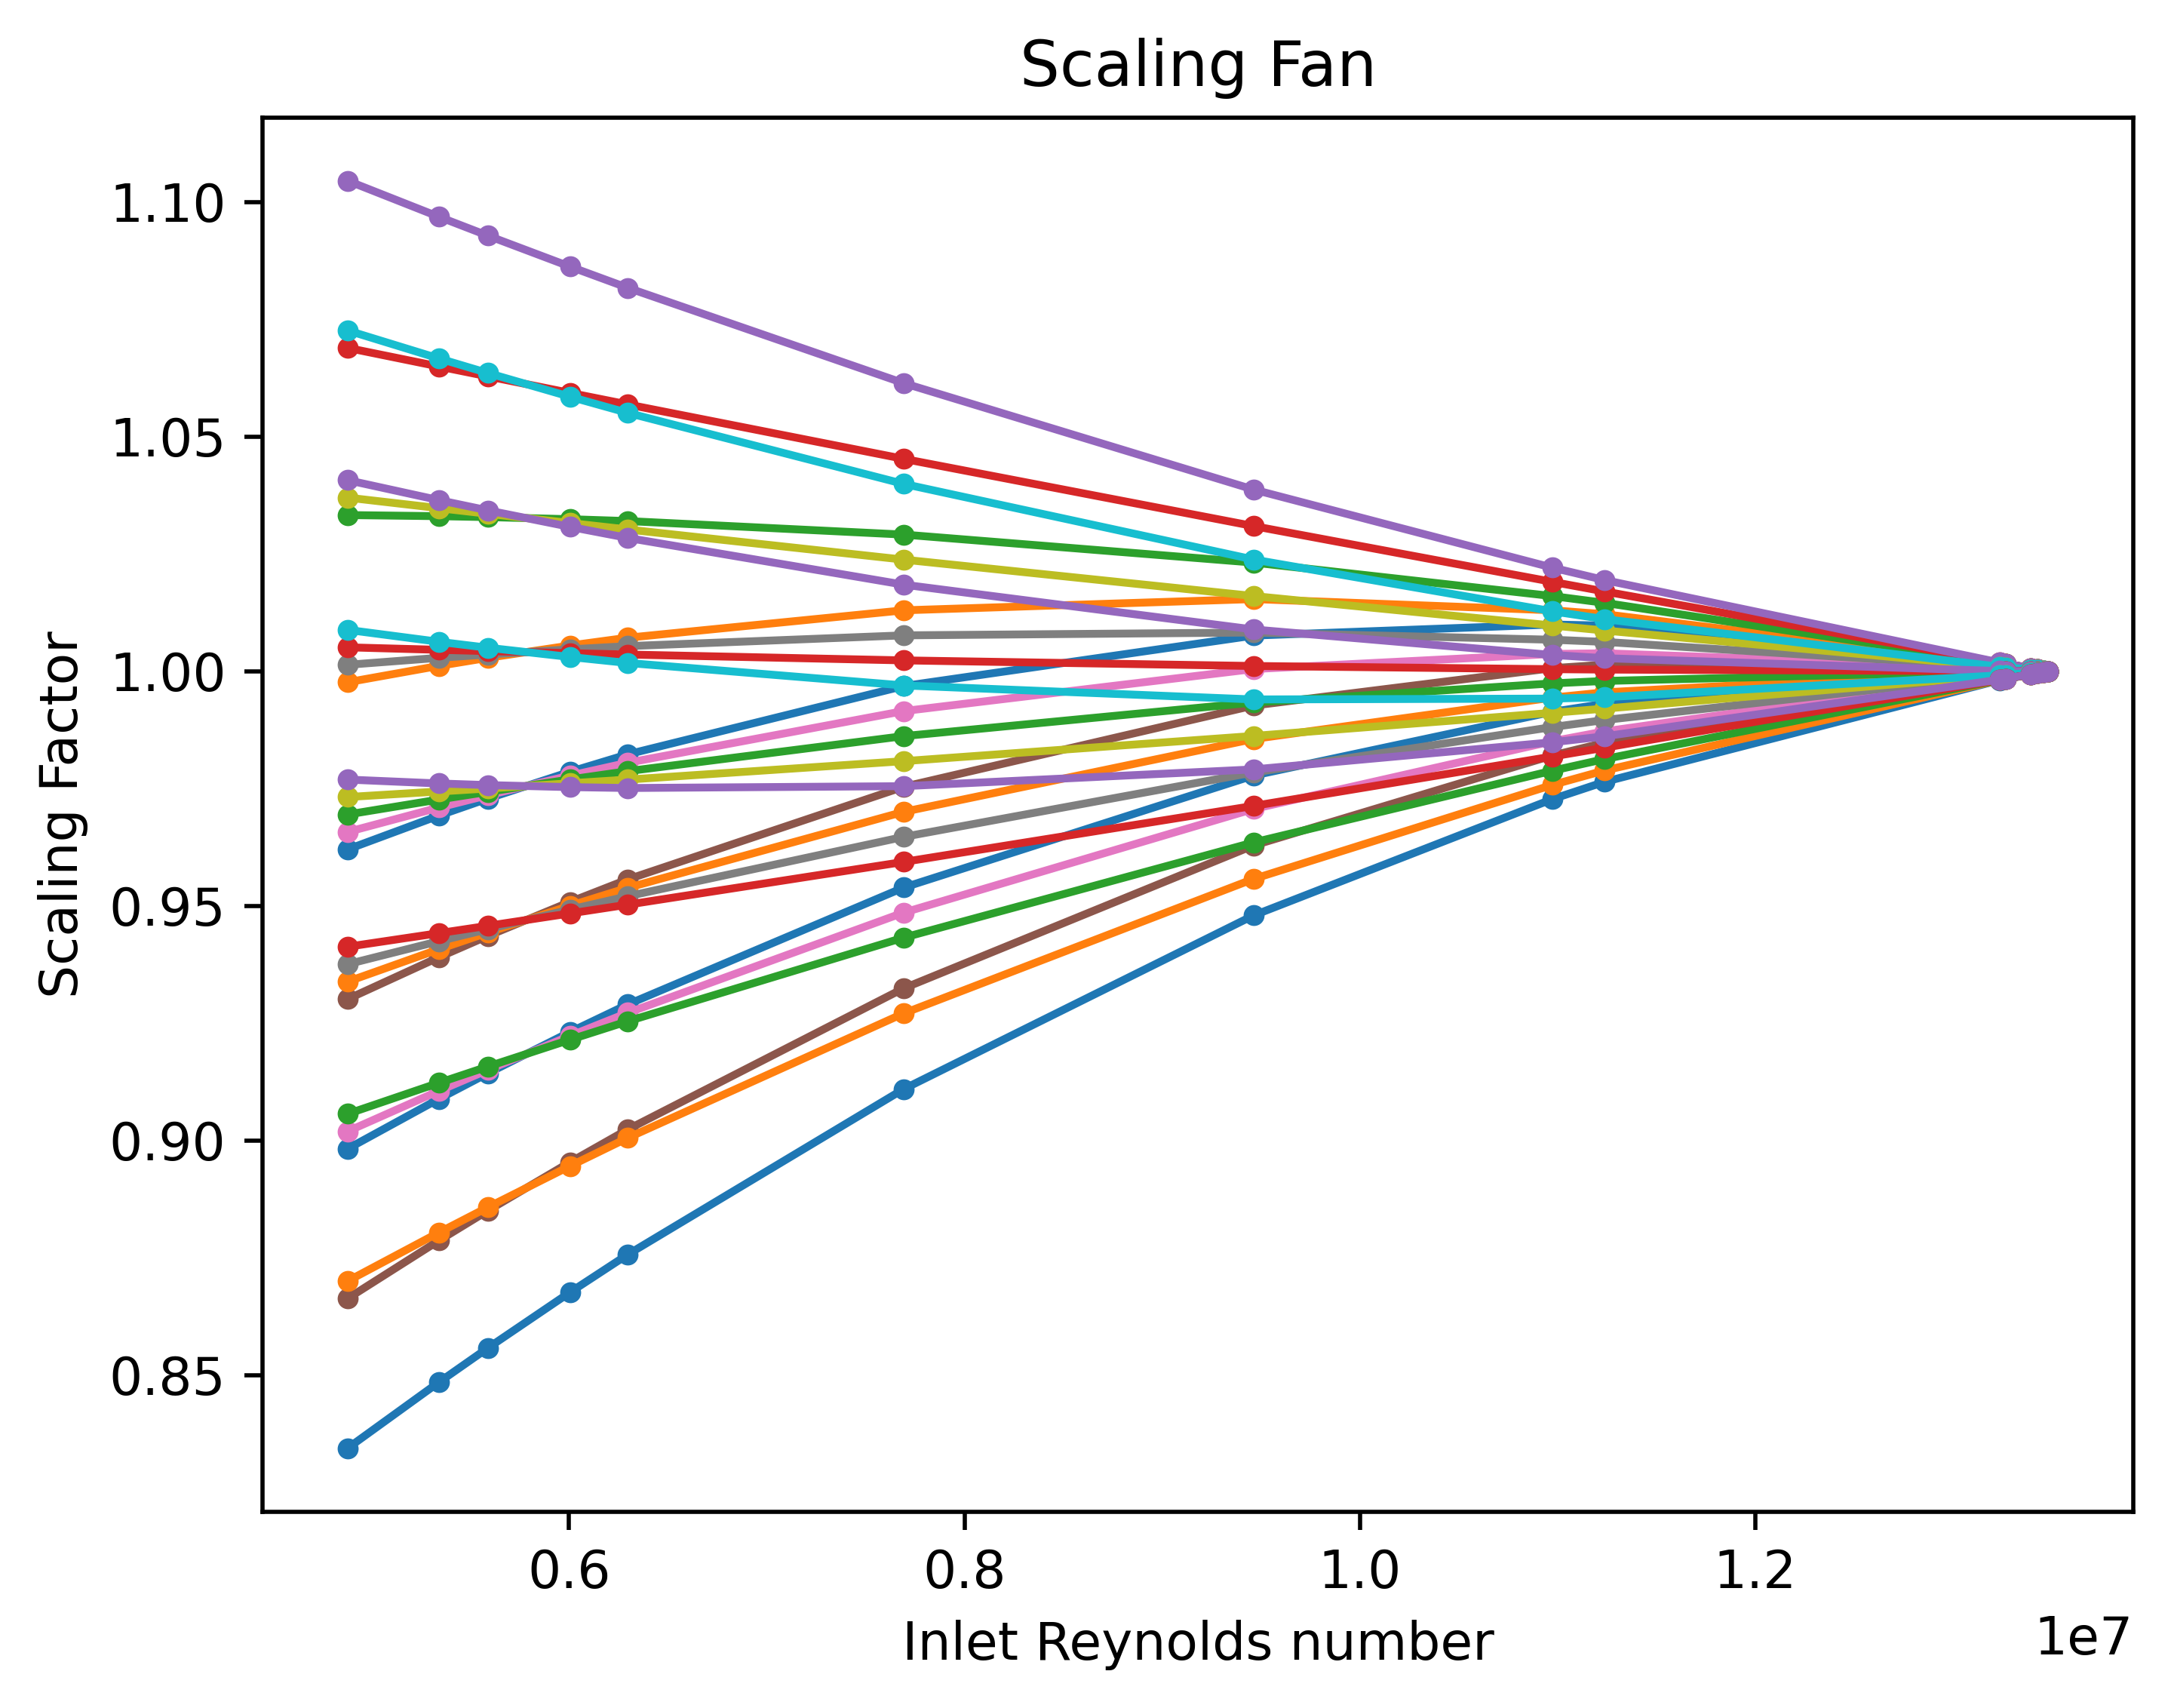

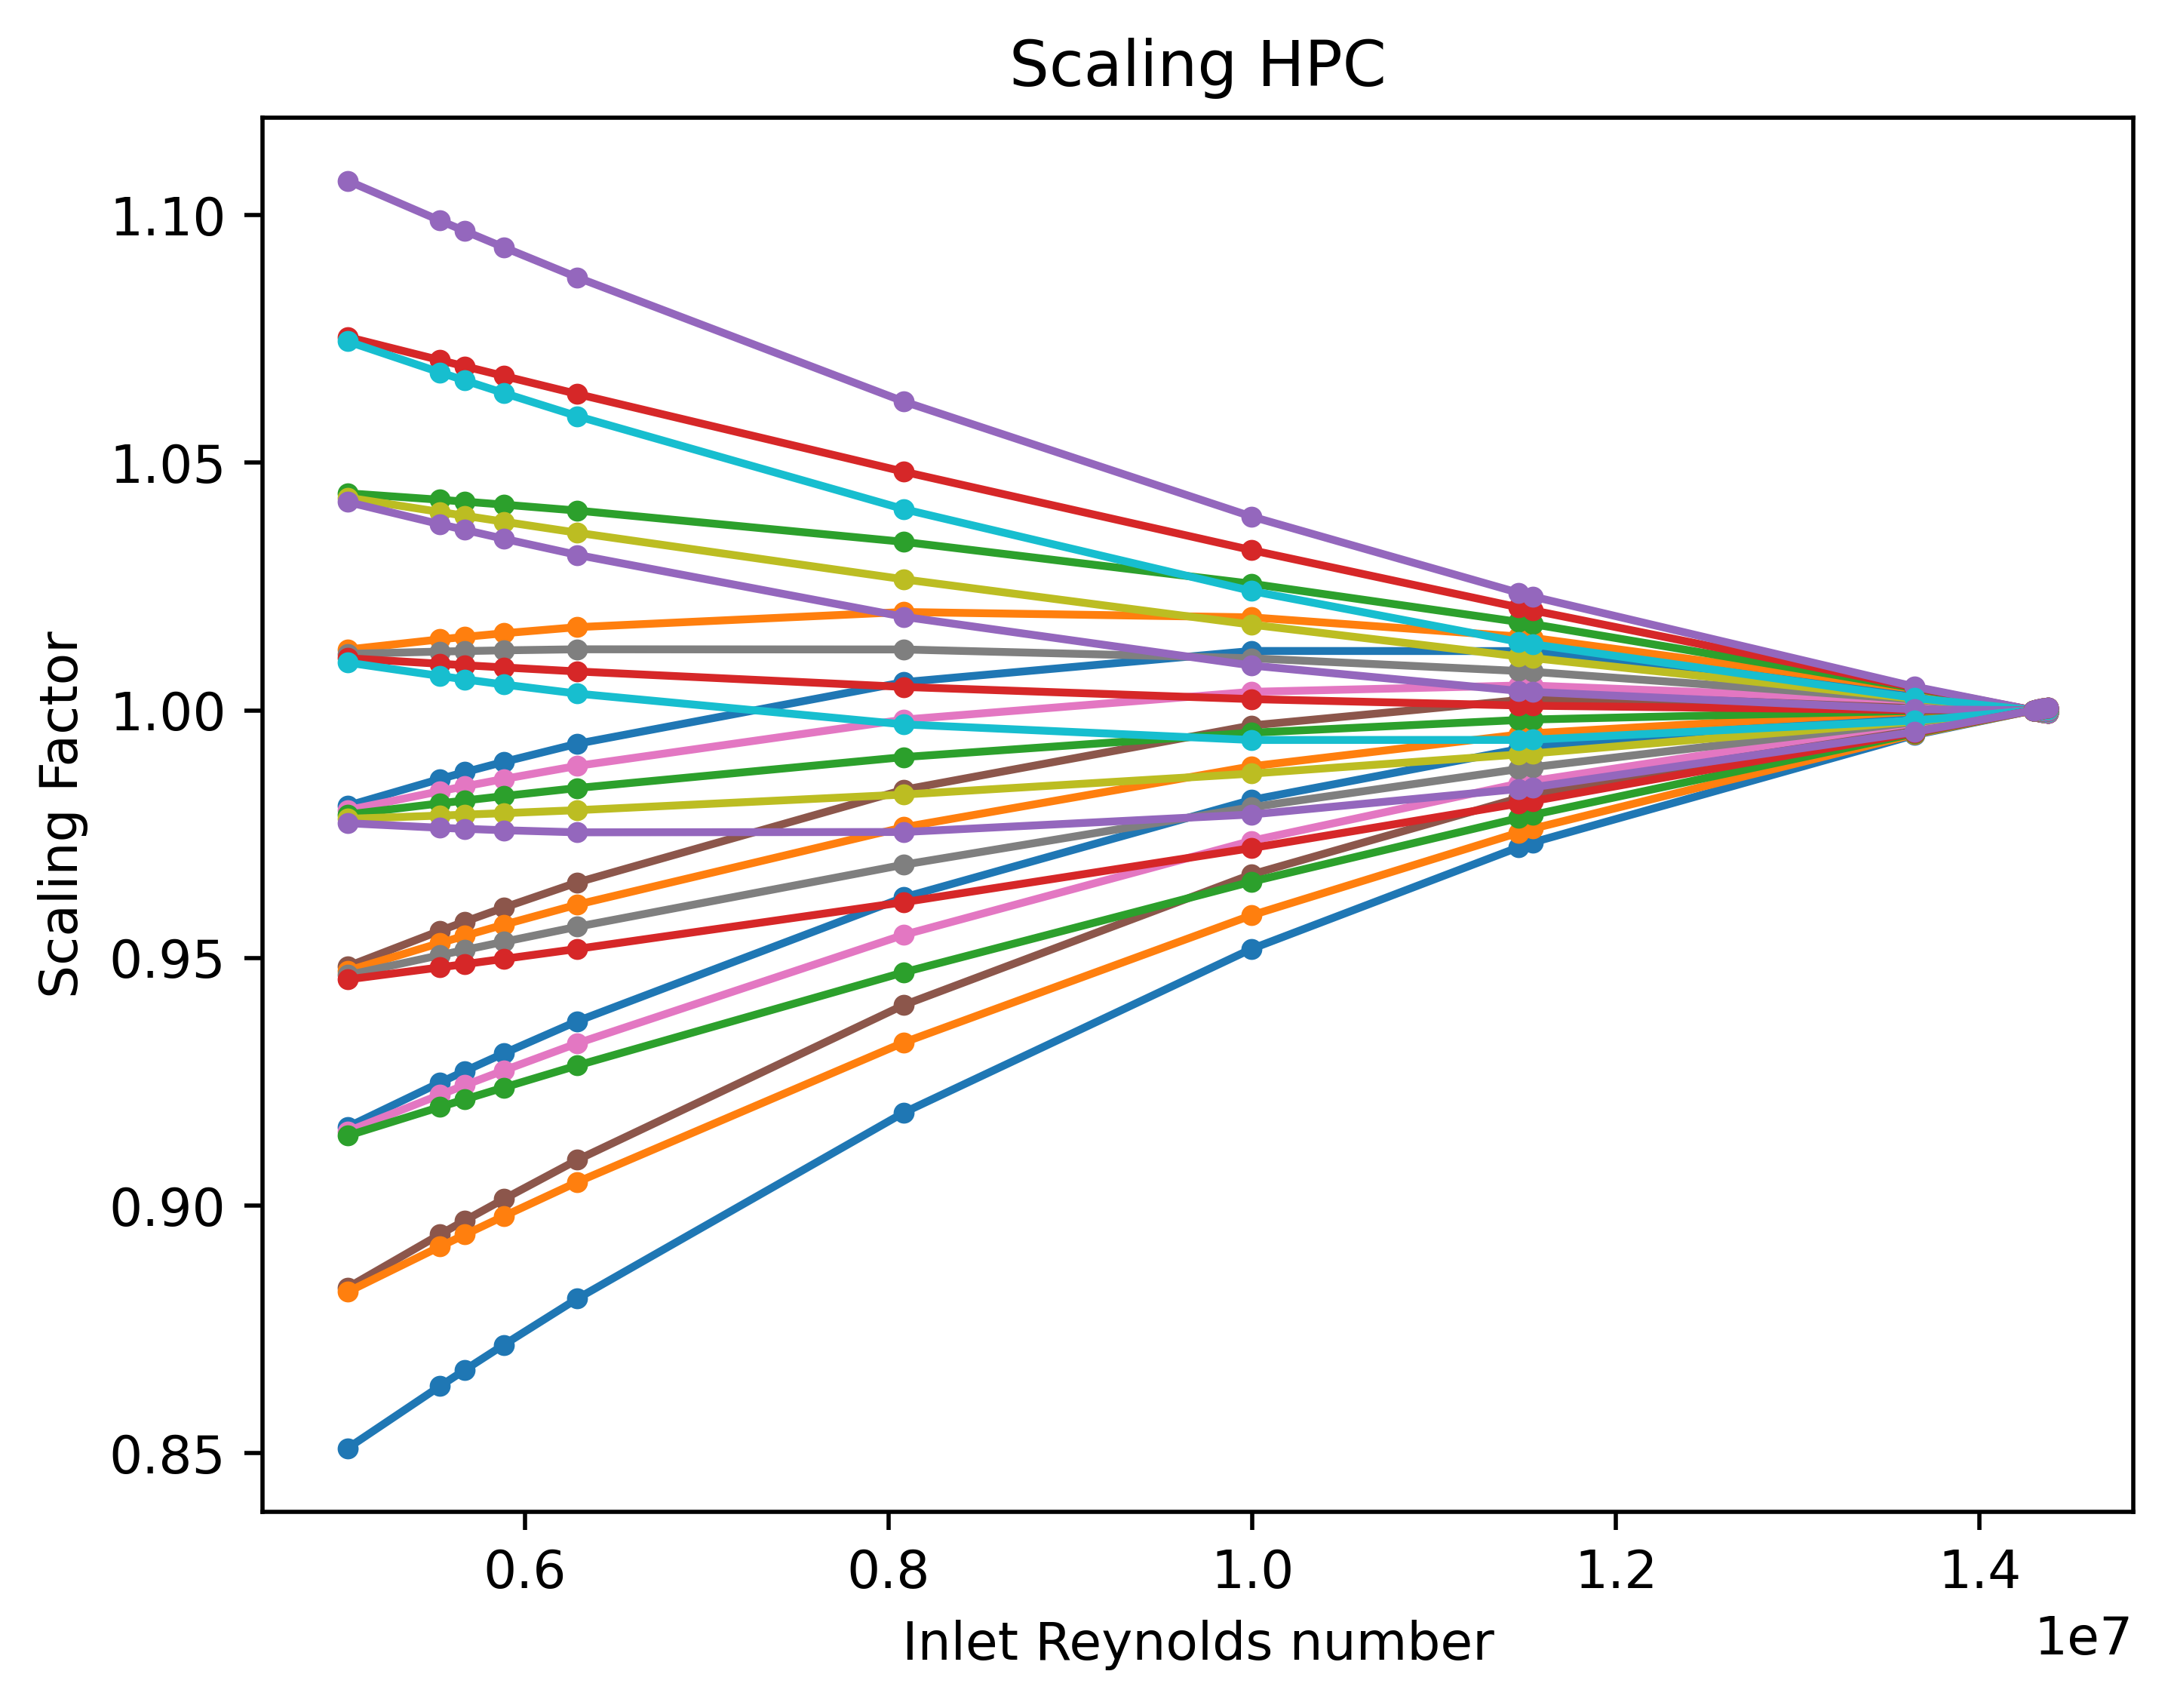

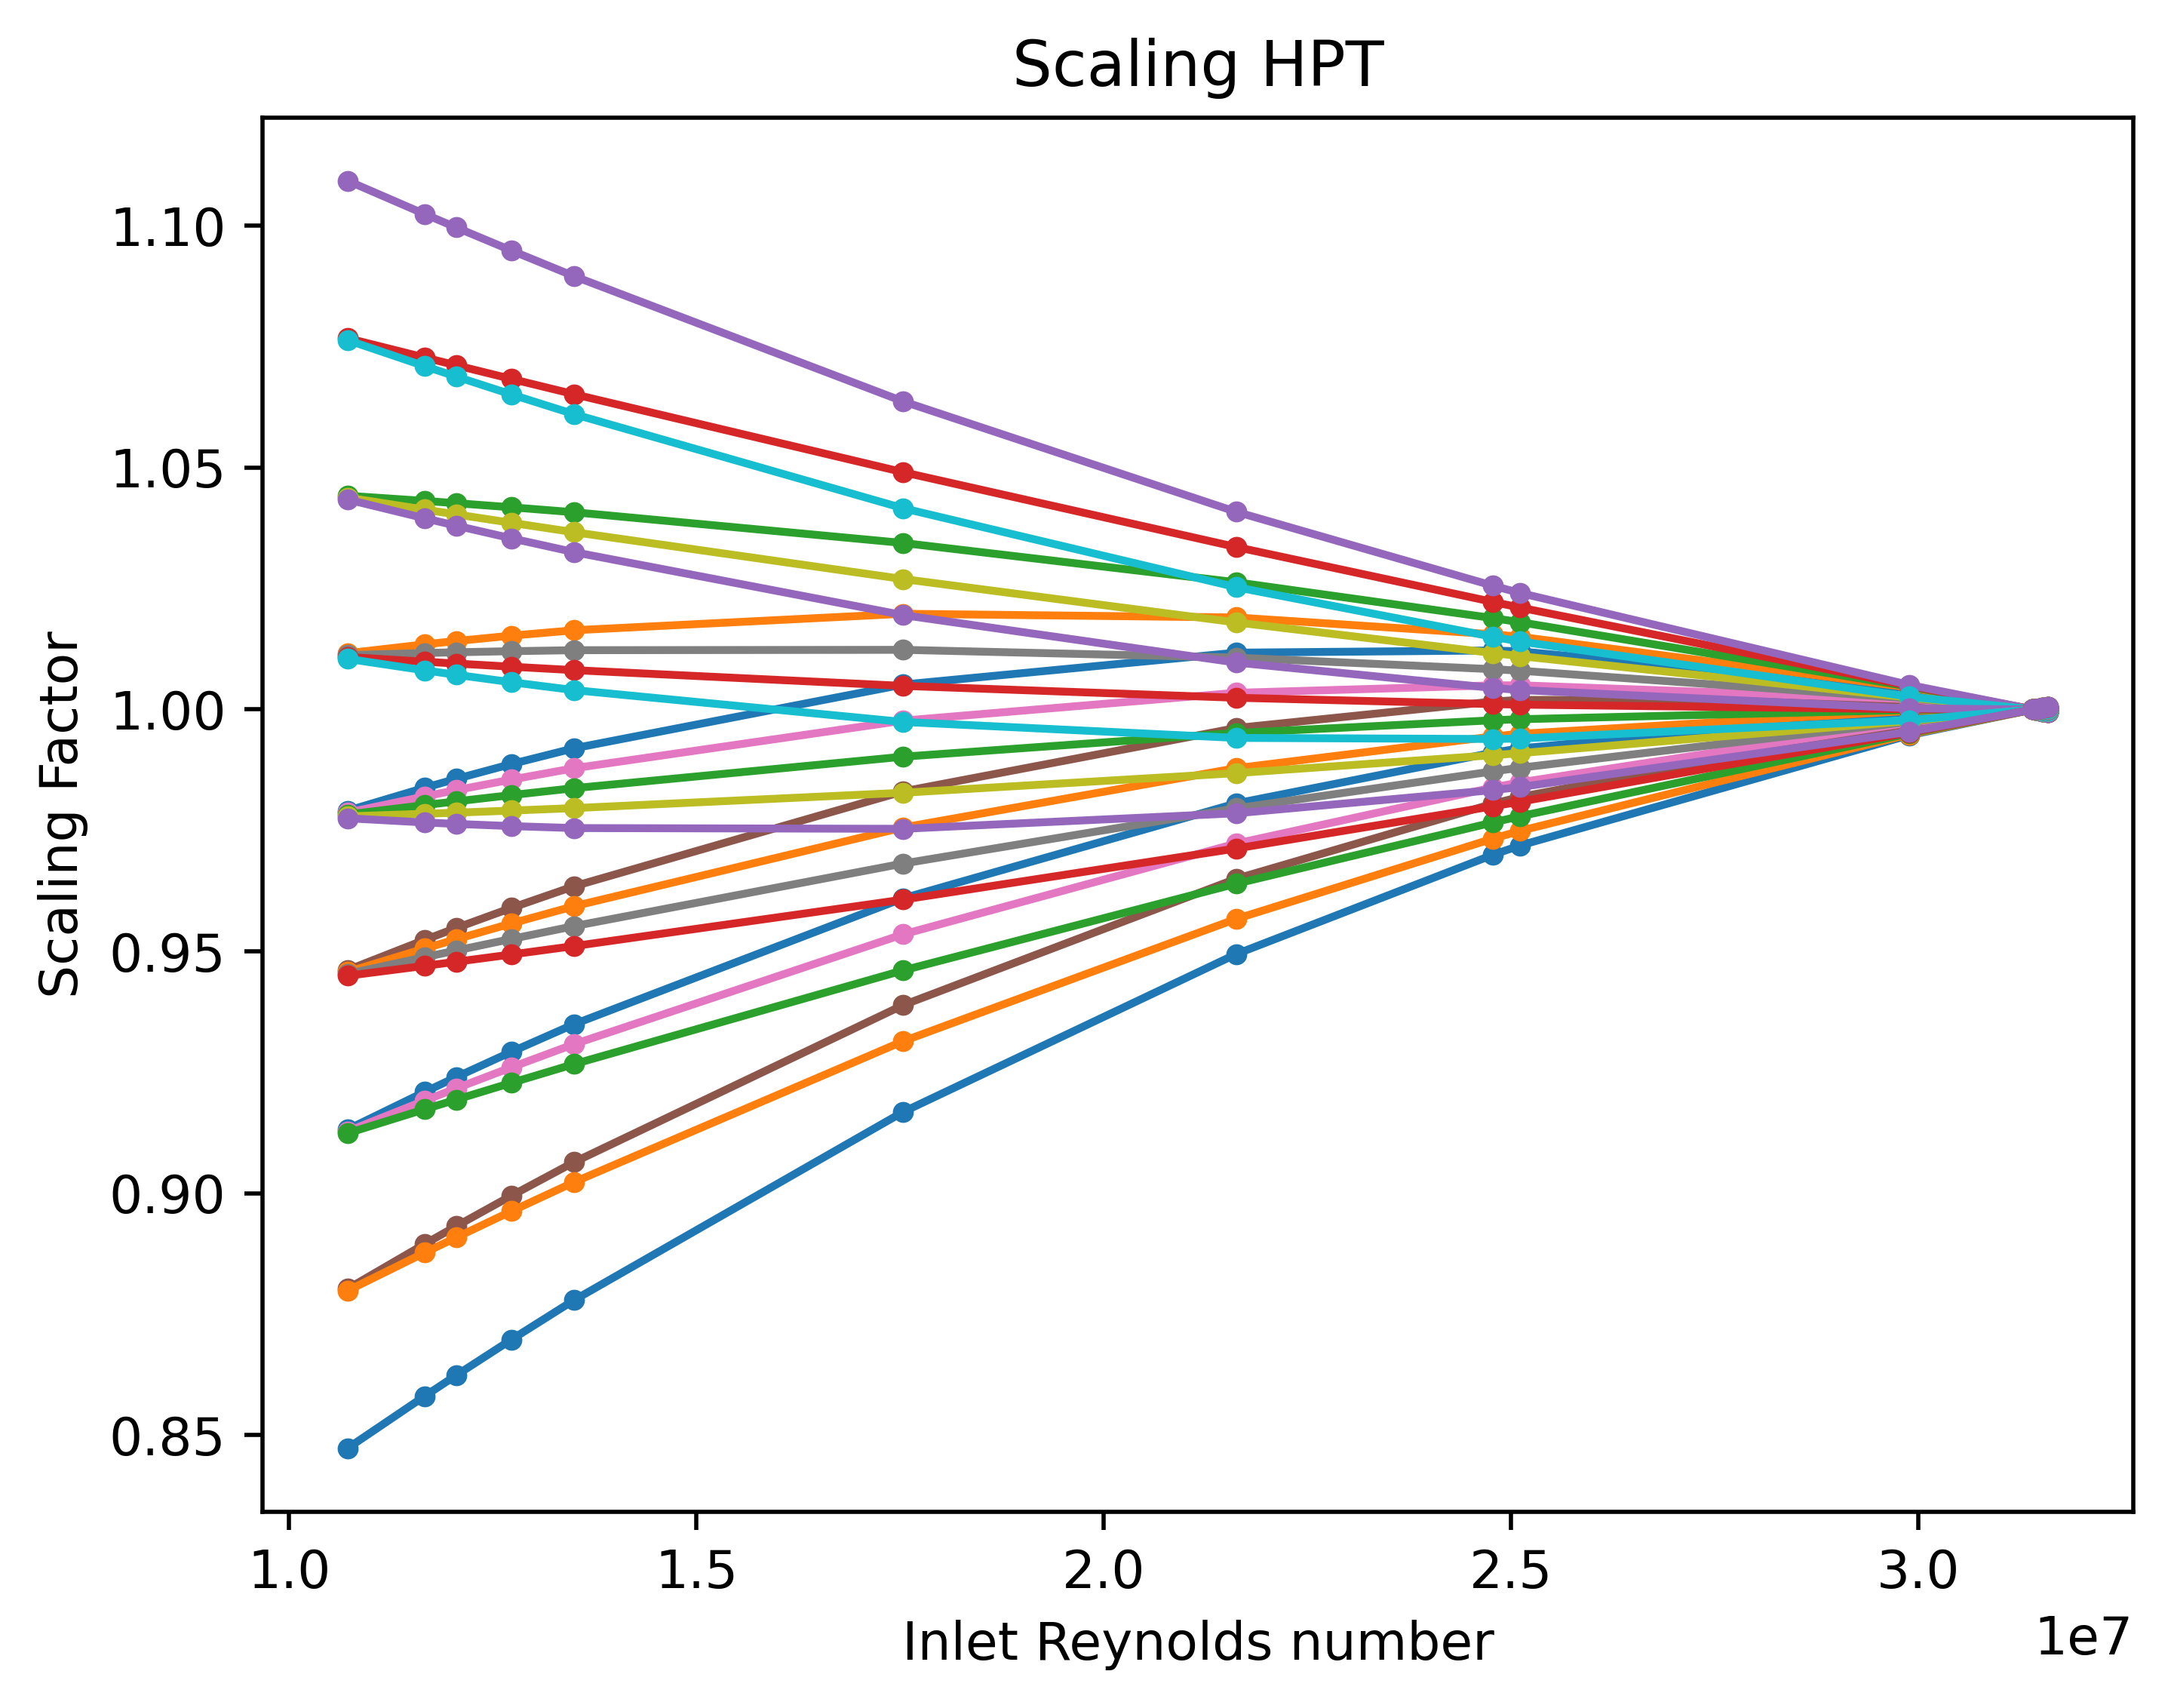

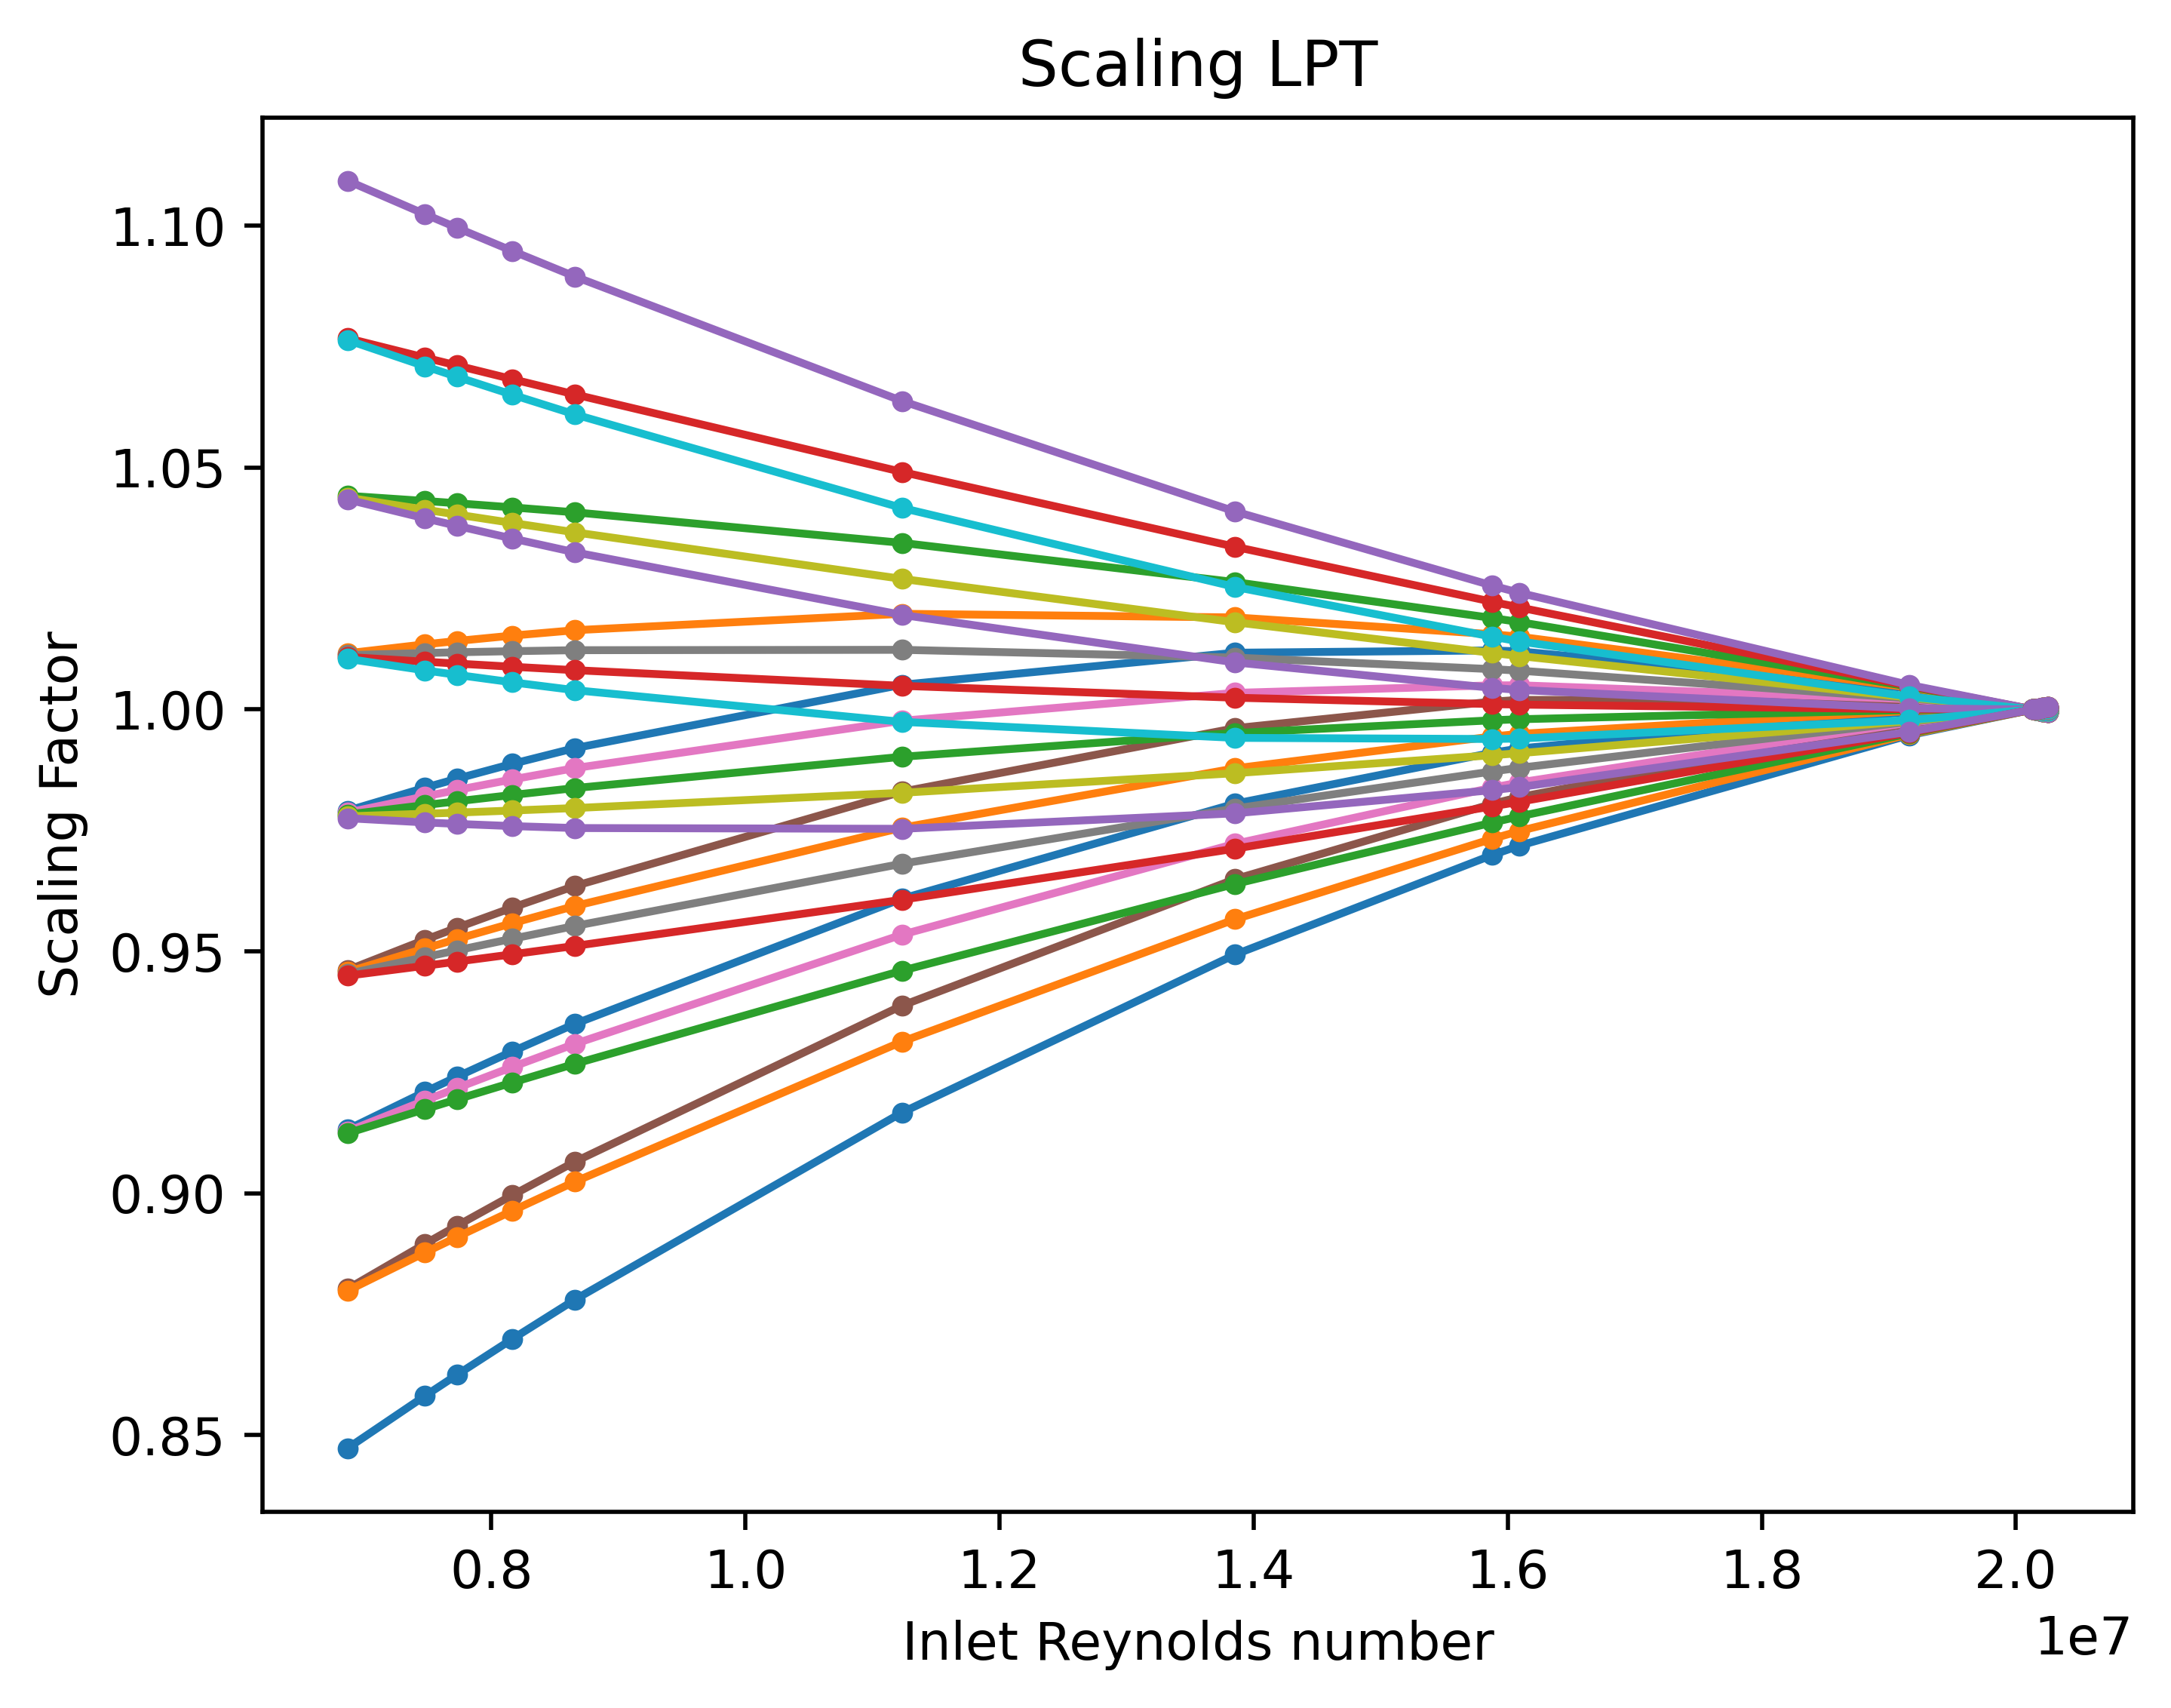

In [42]:
def scaling_function_test(file_name):
    GEnx_OD, GEnx_OD_true, _, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))
    
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
    
    Re2_DP = Re2[0]
    Re25_DP = Re25[0]
    Re19_DP = Re19[0]
    Re3_DP = Re3[0]
    Re4_DP = Re4[0]
    Re49_DP = Re49[0]
    Re5_DP = Re5[0]
    
#     GEnx_OD = GEnx_OD[10:, :]
#     GEnx_OD_true = GEnx_OD_true[10:, :]
#     All_Reynolds = All_Reynolds[10:, :]

    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
    print(All_Reynolds.shape)
    
    
    print("design point Re3", Re3_DP)
    

    def plot(ab_array, DP, OD, title):
        plt.figure(dpi=500)
        plt.title(title)
        lower_a, upper_a, lower_b, upper_b = ab_array
        colors = ['b', 'g', 'r', 'c', 'm']  # You can customize the colors
        markers = ['o', 's', 'D', '^', 'v']  # You can customize the markers
        for i, a in enumerate(np.linspace(lower_a, upper_a, 5)):
            for b in np.linspace(lower_b, upper_b, 5):
                label = f'a={a:.2f}, b={b:.2f}'  # Label for the legend
                SF = scaling_F(DP, np.sort(OD), a, b)
                plt.plot(np.sort(OD), SF, label=label, marker=".")
        plt.ylabel("Scaling Factor")
        plt.xlabel("Inlet Reynolds number")
        plt.show()
        
    ab_array = [-0.1, 0.1, -0.25, 0.1]
    plot(ab_array, Re2_DP, Re2, "Scaling Fan")
    
    ab_array = [-0.1, 0.1, -0.2, 0.1]
    plot(ab_array, Re25_DP, Re25, "Scaling HPC")
    
    ab_array = [-0.1, 0.1, -0.2, 0.1]
    plot(ab_array, Re4_DP, Re4, "Scaling HPT")
    
    ab_array = [-0.1, 0.1, -0.2, 0.1]
    plot(ab_array, Re49_DP, Re49, "Scaling LPT")
    
    
scaling_function_test(file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled")

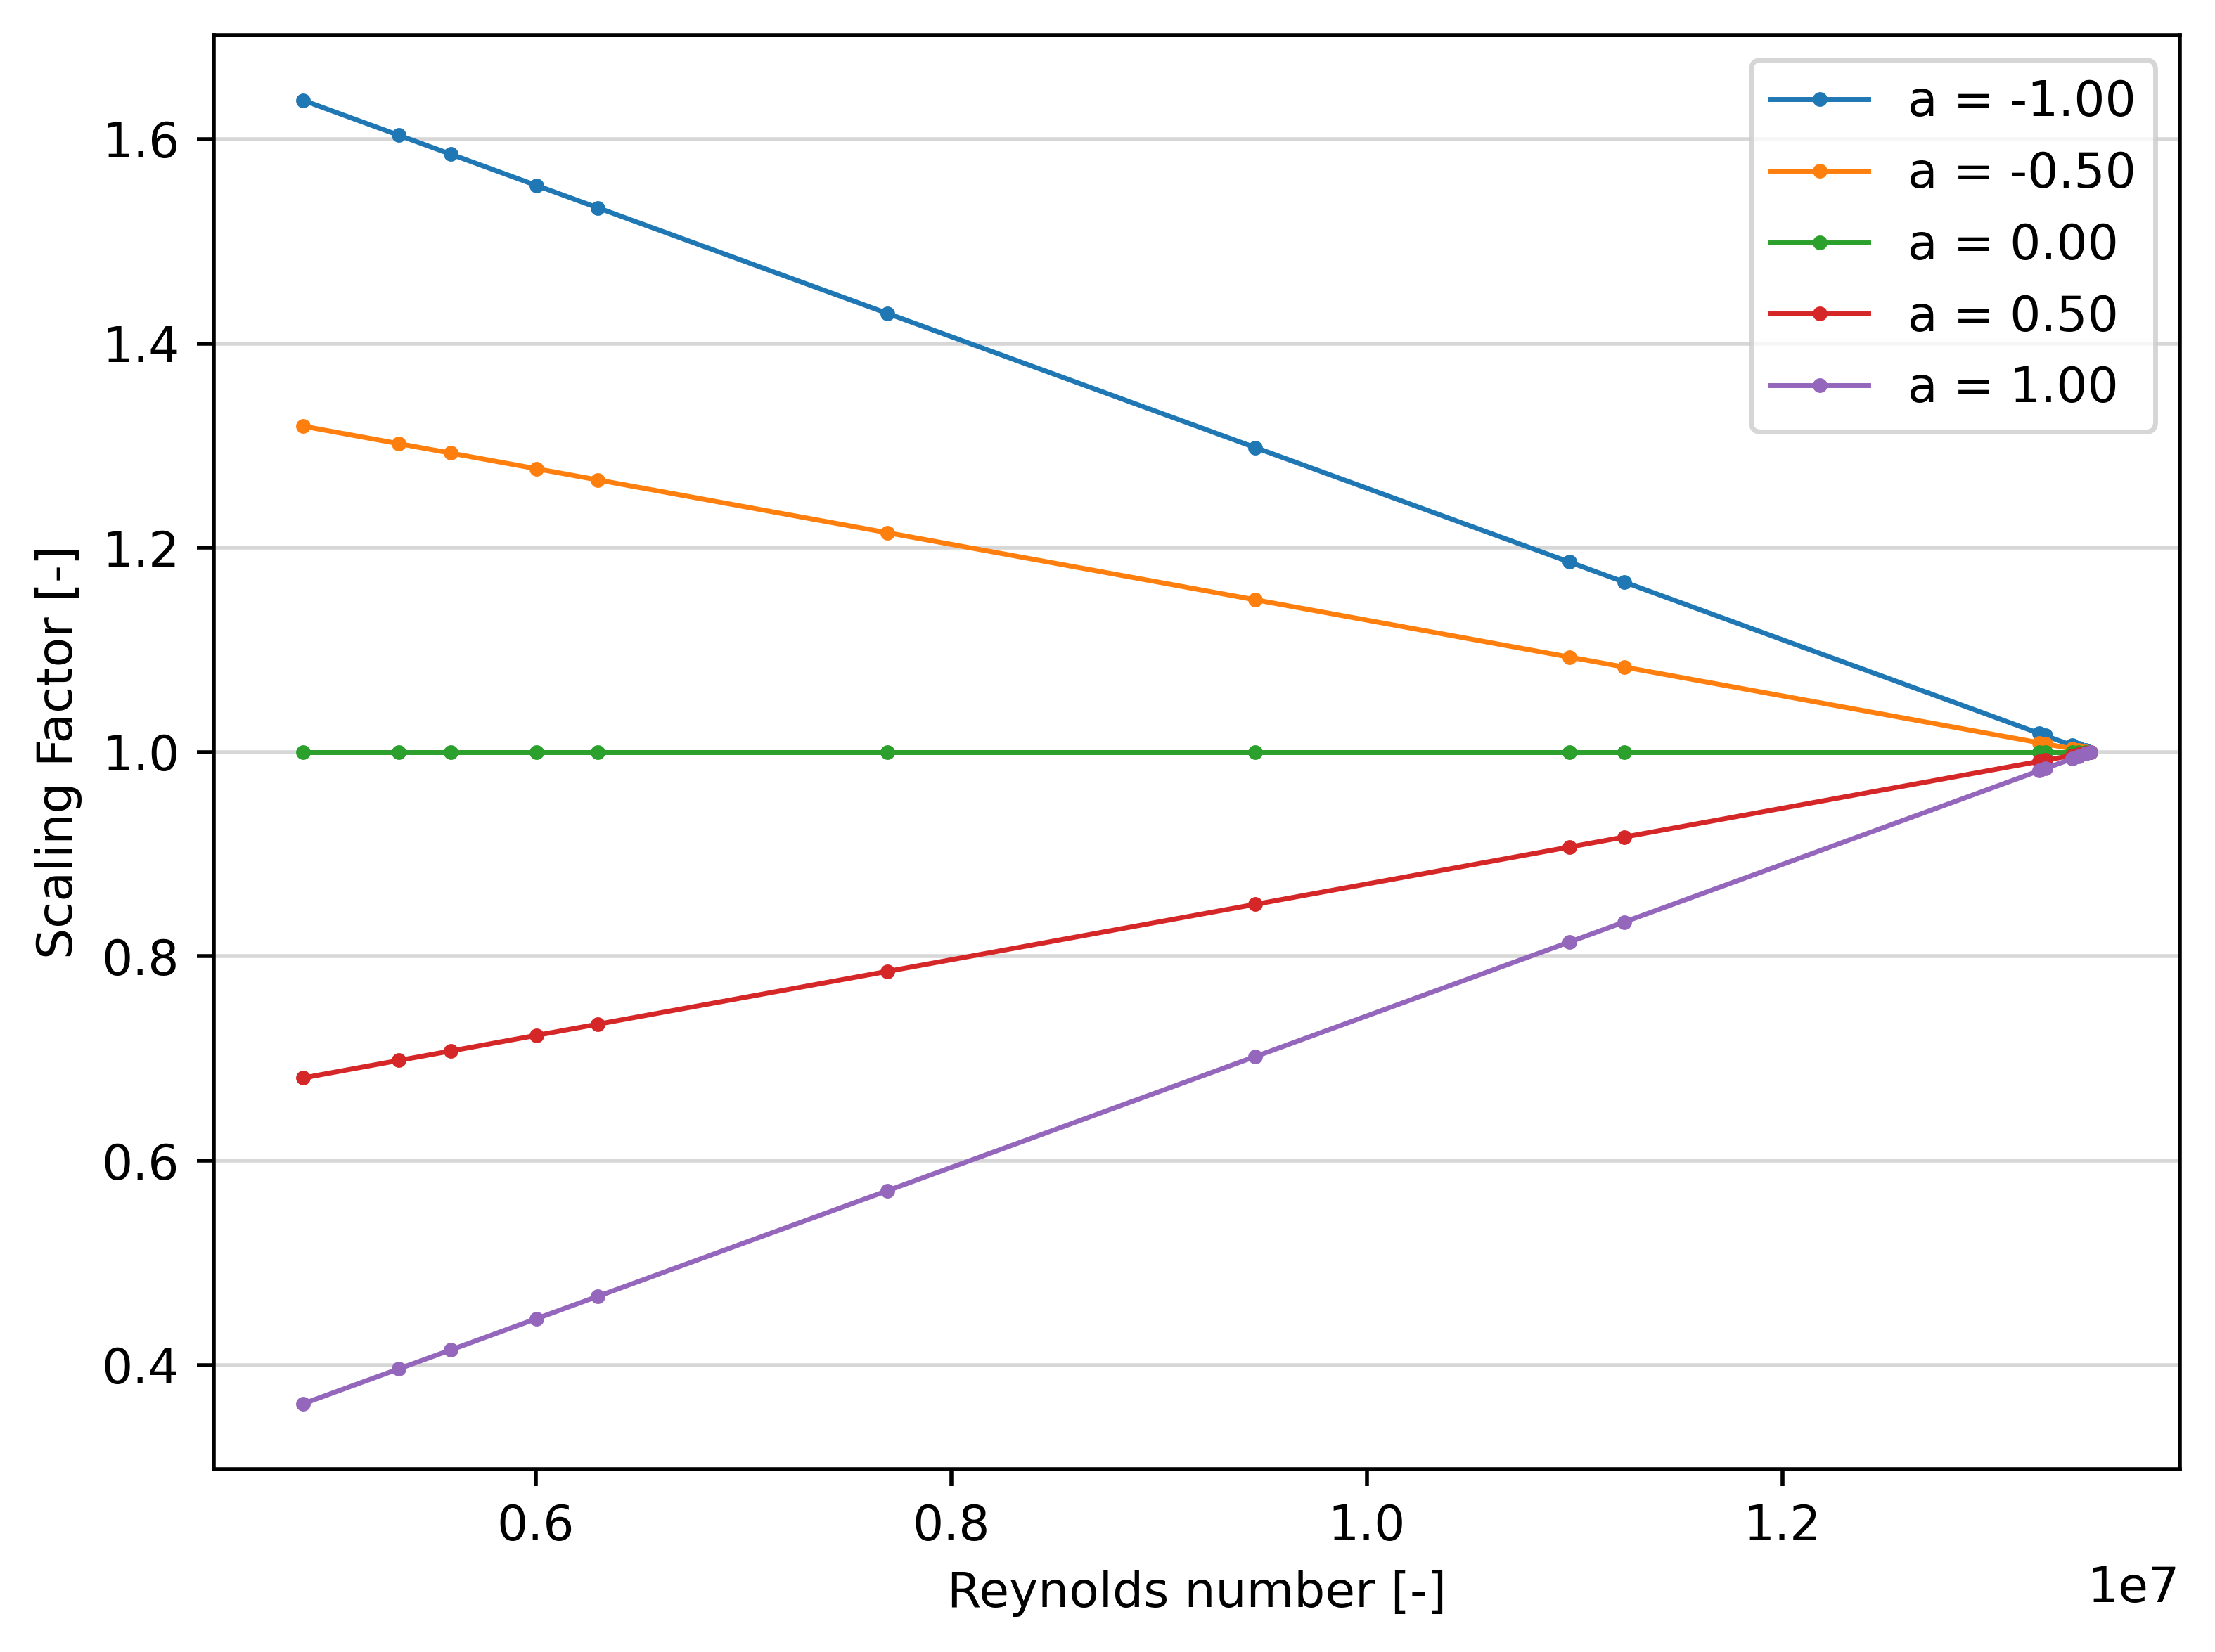

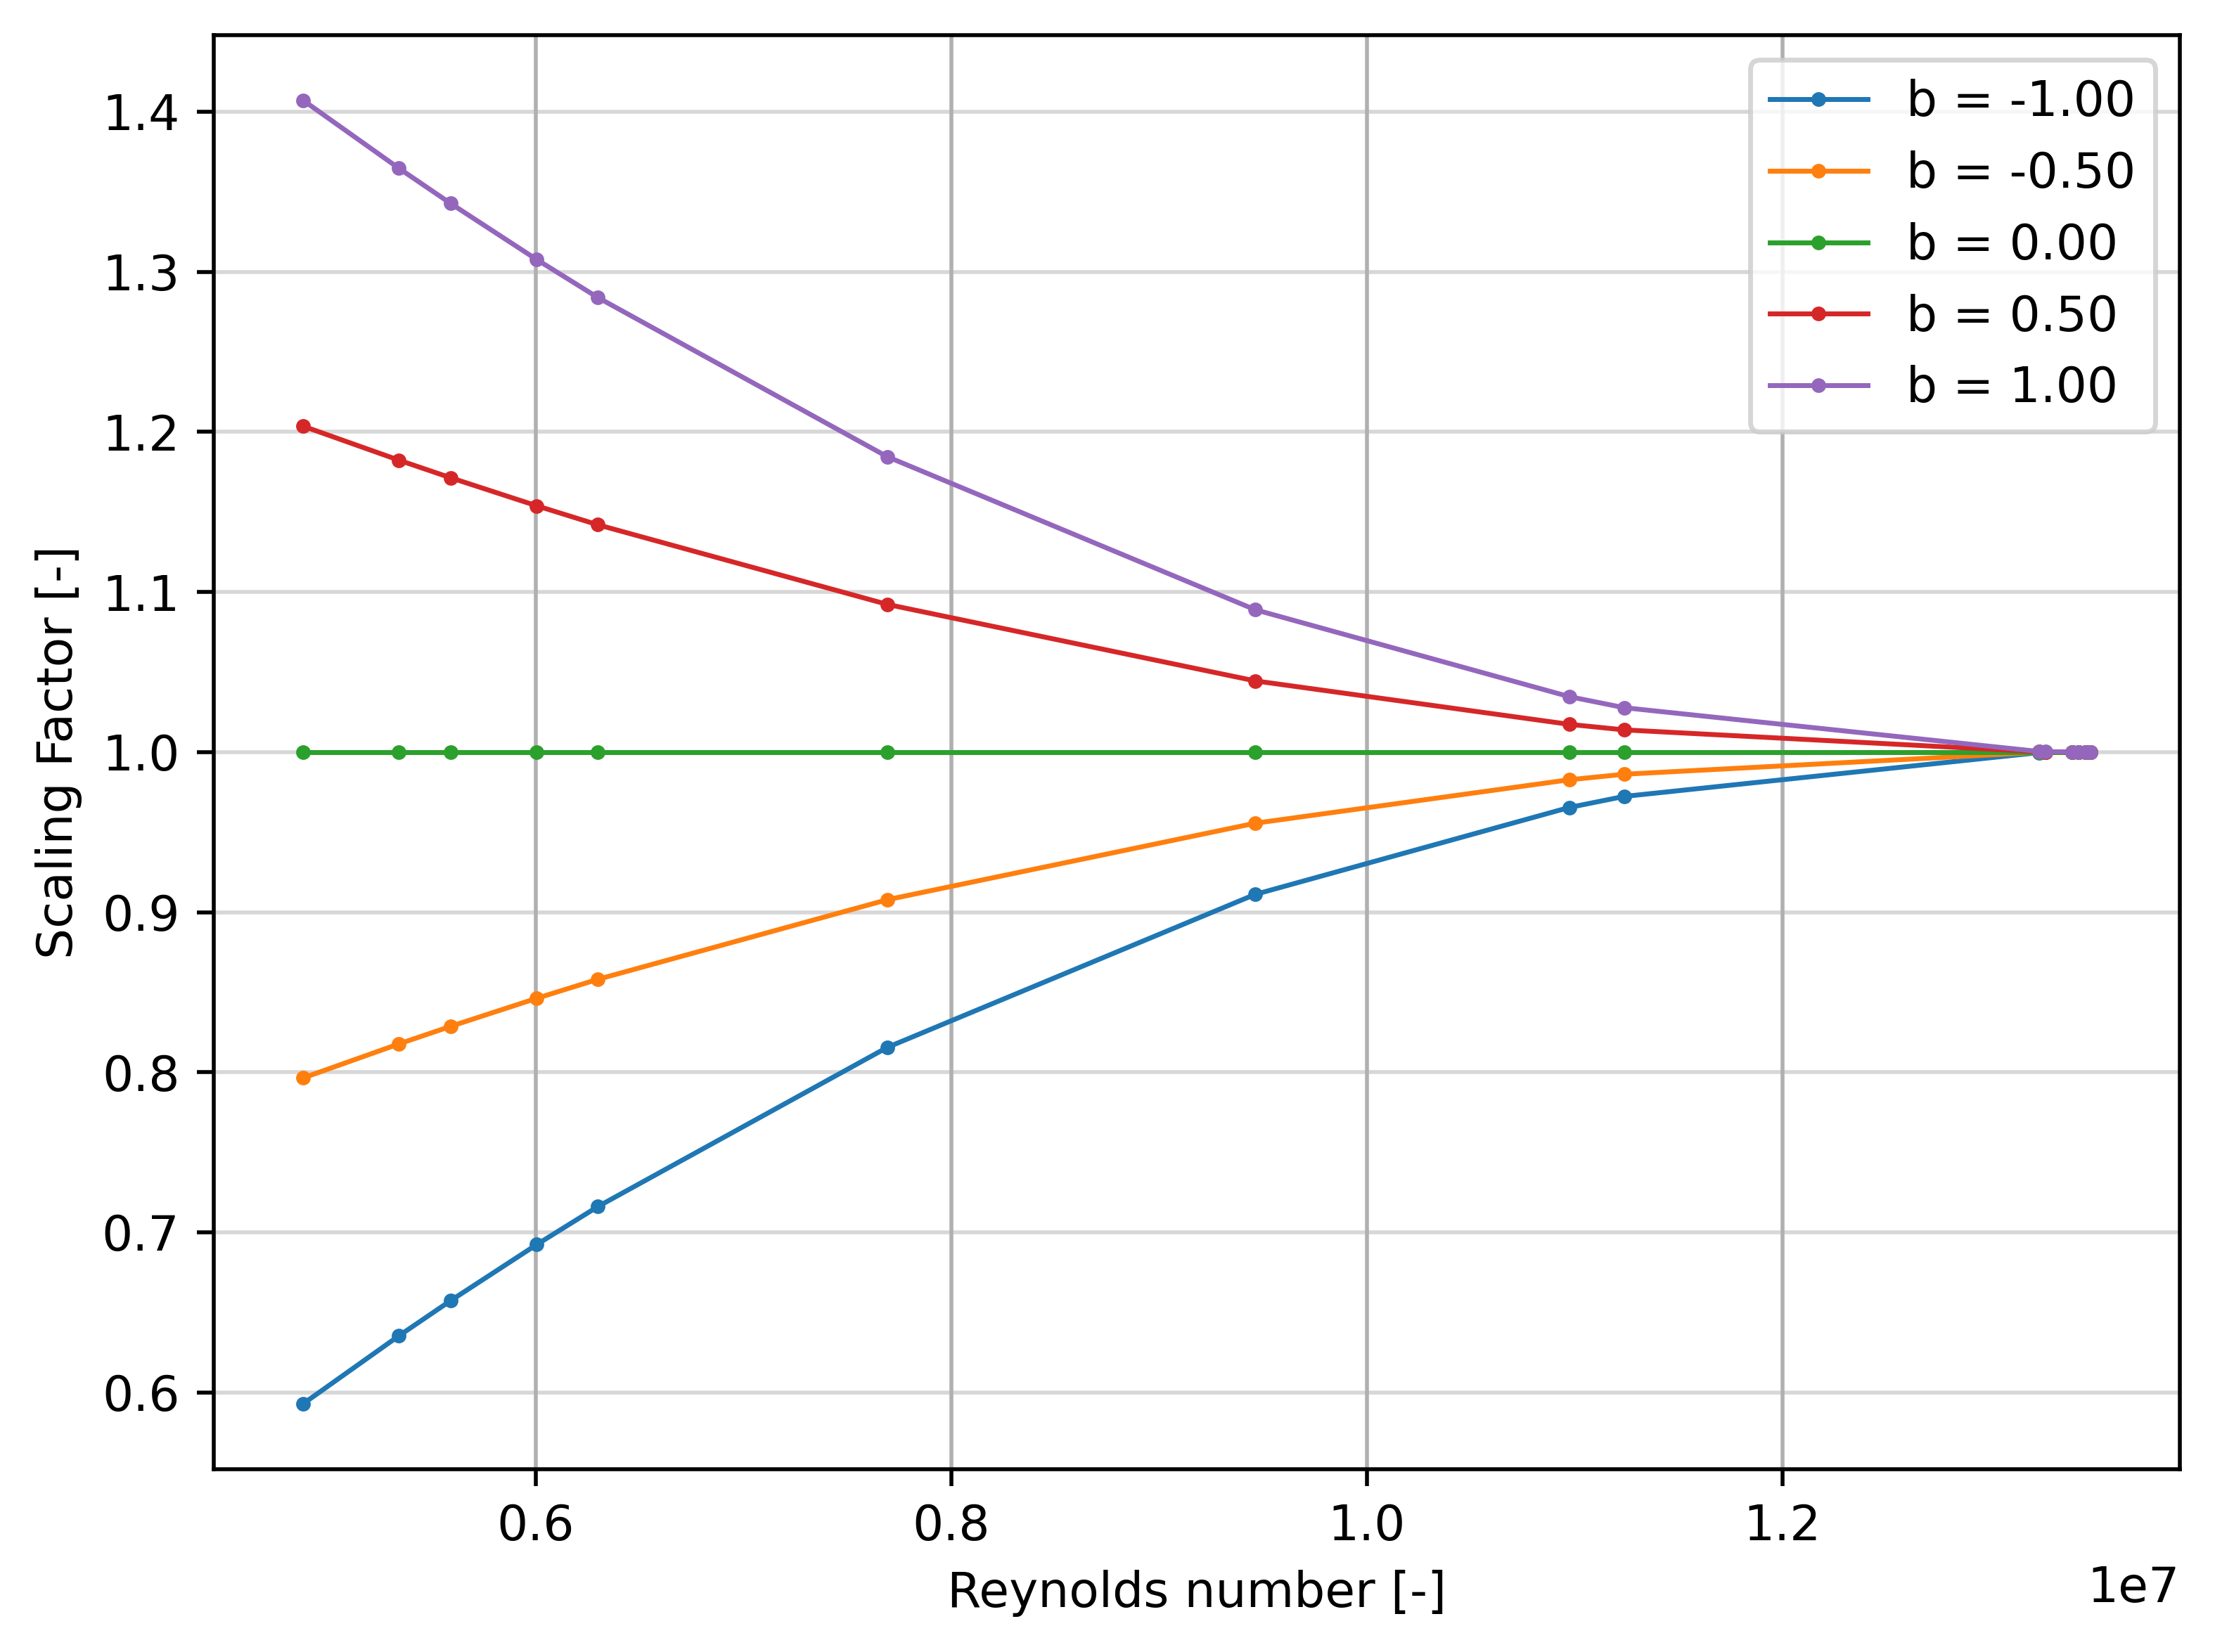

In [43]:

def plot_coefficients_effect(file_name):
    GEnx_OD, GEnx_OD_true, alt_time, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))
    
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
    
    Re2_DP = Re2[0]
    Re25_DP = Re25[0]
    Re19_DP = Re19[0]
    Re3_DP = Re3[0]
    Re4_DP = Re4[0]
    Re49_DP = Re49[0]
    Re5_DP = Re5[0]
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T

    def plot_a_cnst_b(ab_array, DP, OD, title):
#         plt.title(title)
        plt.figure(dpi=500)
        lower_a, upper_a, lower_b, upper_b = ab_array
        colors = ['b', 'g', 'r', 'c', 'm']  # You can customize the colors
        markers = ['o', 's', 'D', '^', 'v']  # You can customize the markers
        for i, a in enumerate(np.linspace(lower_a, upper_a, 5)):
            label = f'a = {a:.2f}'  # Label for the legend
            SF = scaling_F(DP, np.sort(OD), a, 0)
            plt.plot(np.sort(OD), SF, label=label, marker='.', markersize=4, linewidth=1)
        plt.ylabel("Scaling Factor [-]")
        plt.xlabel("Reynolds number [-]")
#         plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.gca().grid(True, alpha=0.5, axis='y')
        plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
                   + title + '.jpeg')
        plt.show()
    
    ab_array = [-1, 1, 0, 0]
    plot_a_cnst_b(ab_array, Re2_DP, Re2, "Scaling function with b = const")
    
    def plot_b_cnst_a(ab_array, DP, OD, title):
#         plt.title(title)
        plt.figure(dpi=500)
        lower_a, upper_a, lower_b, upper_b = ab_array
        colors = ['b', 'g', 'r', 'c', 'm']  # You can customize the colors
        markers = ['o', 's', 'D', '^', 'v']  # You can customize the markers
        for i, b in enumerate(np.linspace(lower_b, upper_b, 5)):
            label = f'b = {b:.2f}'  # Label for the legend
            SF = scaling_F(DP, np.sort(OD), 0, b)
            plt.plot(np.sort(OD), SF, label=label, marker='.', markersize=4,linewidth=1)
        plt.ylabel("Scaling Factor [-]")
        plt.xlabel("Reynolds number [-]")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.gca().grid(True, alpha=0.5, axis='y')
        plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
                   + title + '.jpeg')
        plt.show()
        
    ab_array = [0, 0, -1, 1]
    plot_b_cnst_a(ab_array, Re2_DP, Re2, "Scaling function with a = const")
    

plot_coefficients_effect(file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled")

In [44]:
# def filter_outliers_1d(data):
#     print(f'data size at the beginning {data.shape}')
#     if len(data) == 0:
#         print("data is empty")
#         pass
#     else:
#         q1 = np.percentile(data, 25)
#         q3 = np.percentile(data, 75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         condition = (data >= lower_bound) & (data <= upper_bound)
#         print(sum(condition))
#     return condition

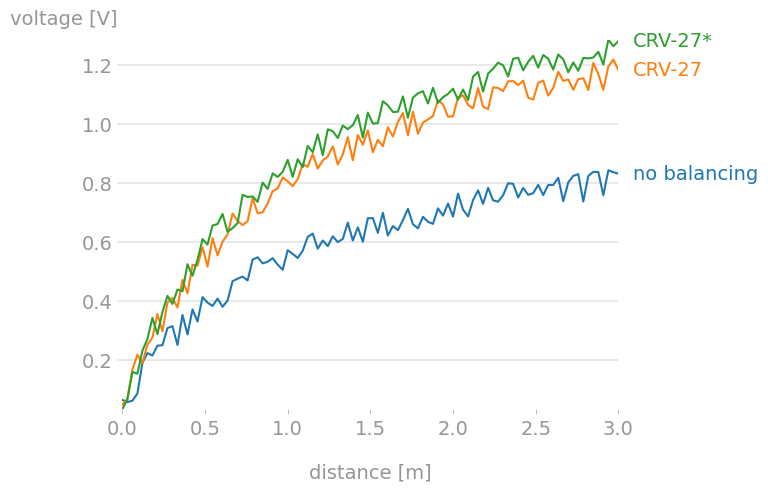

In [45]:
import dufte
def line():
    rng = np.random.default_rng(0)

    offsets = [1.0, 1.50, 1.60]
    labels = ["no balancing", "CRV-27", "CRV-27*"]
    x0 = np.linspace(0.0, 3.0, 100)
    y = [offset * x0 / (x0 + 1) + 0.1 * rng.random(len(x0)) for offset in offsets]

    # dufte
    with plt.style.context(dufte.style):
        for yy, label in zip(y, labels):
            plt.plot(x0, yy, label=label)
        plt.xlabel("distance [m]")
        dufte.ylabel("voltage [V]")
        dufte.legend()
#         plt.savefig("ex1-dufte.svg", transparent=True, bbox_inches="tight")
        plt.show()
        plt.close()

line()

In [46]:
from matplotlib.ticker import ScalarFormatter
from sklearn.ensemble import IsolationForest

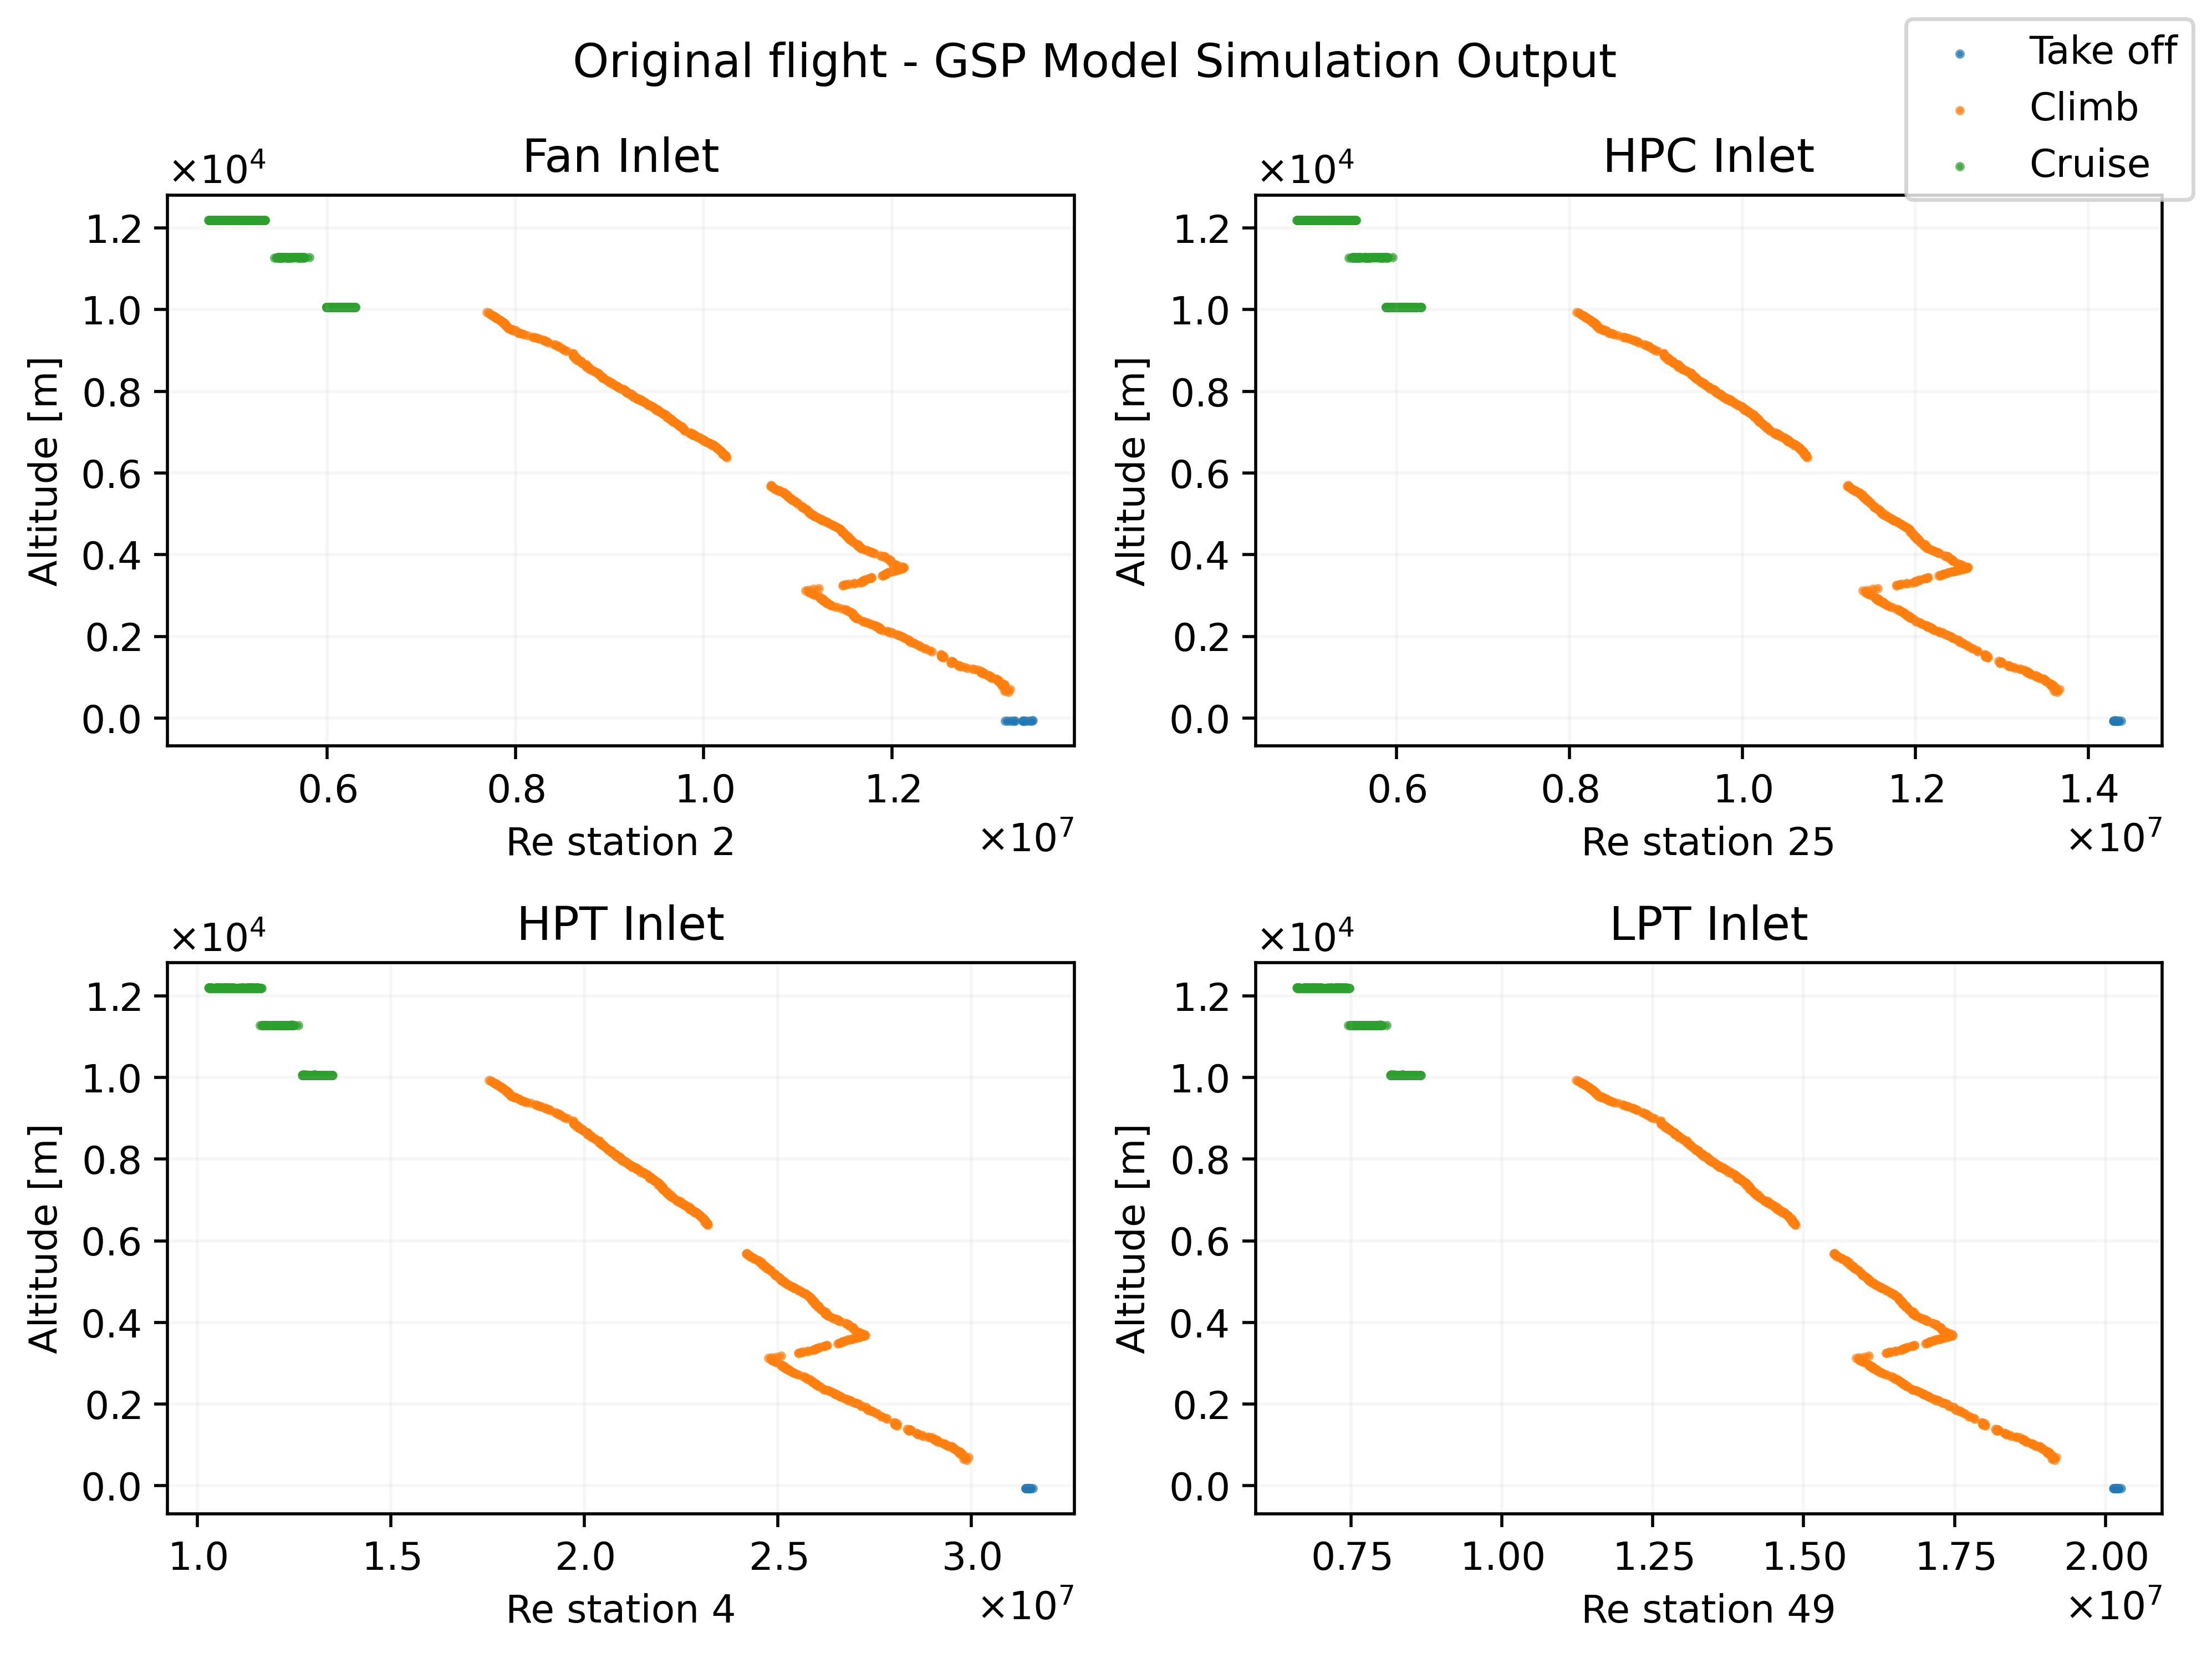

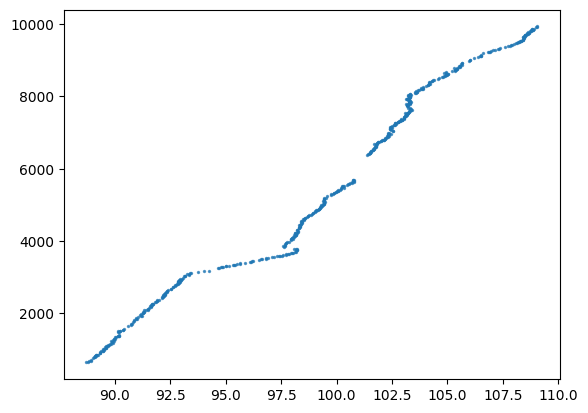

In [47]:
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2"
GEnx_OD, GEnx_OD_true, _, alt_time, All_Reynolds = pickle.load(open(f"Reynolds_pickle/{file_name}.p", "rb"))
take_off_All_Reynolds, climb_All_Reynolds, cruise_All_Reynolds = All_Reynolds
Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(take_off_All_Reynolds).T

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=500)
fig_title = "Original flight - GSP Model Simulation Output"
fig.suptitle(fig_title)
for flight_phase, legend in zip(range(3), ['Take off', 'Climb', 'Cruise']):
    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(All_Reynolds[flight_phase]).T

    
    for ax, data, label, title in zip(axes.flat, 
                                     [Re2, Re25, Re4, Re49],
                                     ['Re2', 'Re25', 'Re4', 'Re49'], 
                                     ['Fan Inlet', 'HPC Inlet', 'HPT Inlet', 'LPT Inlet']):
        
        alt, time = np.array(alt_time[flight_phase]).T
        alt = alt * 0.3048
        

#         data = filtered_data[:, 0]
#         alt = filtered_data[:, 1]

        
        
        ax.scatter(x=data, y=alt, s=2, alpha=0.7,label=legend)
        ax.set_xlabel(f'Re station {label.strip("Re")}')
        ax.set_ylabel('Altitude [m]')
        ax.grid(True, alpha=0.1)
        ax.set_title(title)
        
        # Use ScalarFormatter for the y-axis
        x_formatter = ScalarFormatter(useMathText=True)
        x_formatter.set_scientific(True)
        x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis
        
        y_formatter = ScalarFormatter(useMathText=True)
        y_formatter.set_scientific(True)
        y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis
        
        ax.xaxis.set_major_formatter(x_formatter)
        ax.yaxis.set_major_formatter(y_formatter)

        
# Adjust spacing between subplots
plt.tight_layout()
fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + fig_title + '.jpeg')
plt.show()

plt.scatter(x=GEnx_OD[1][:, 0], y=alt_time[1][:, 0] * 0.3048, s=2, alpha=0.7)

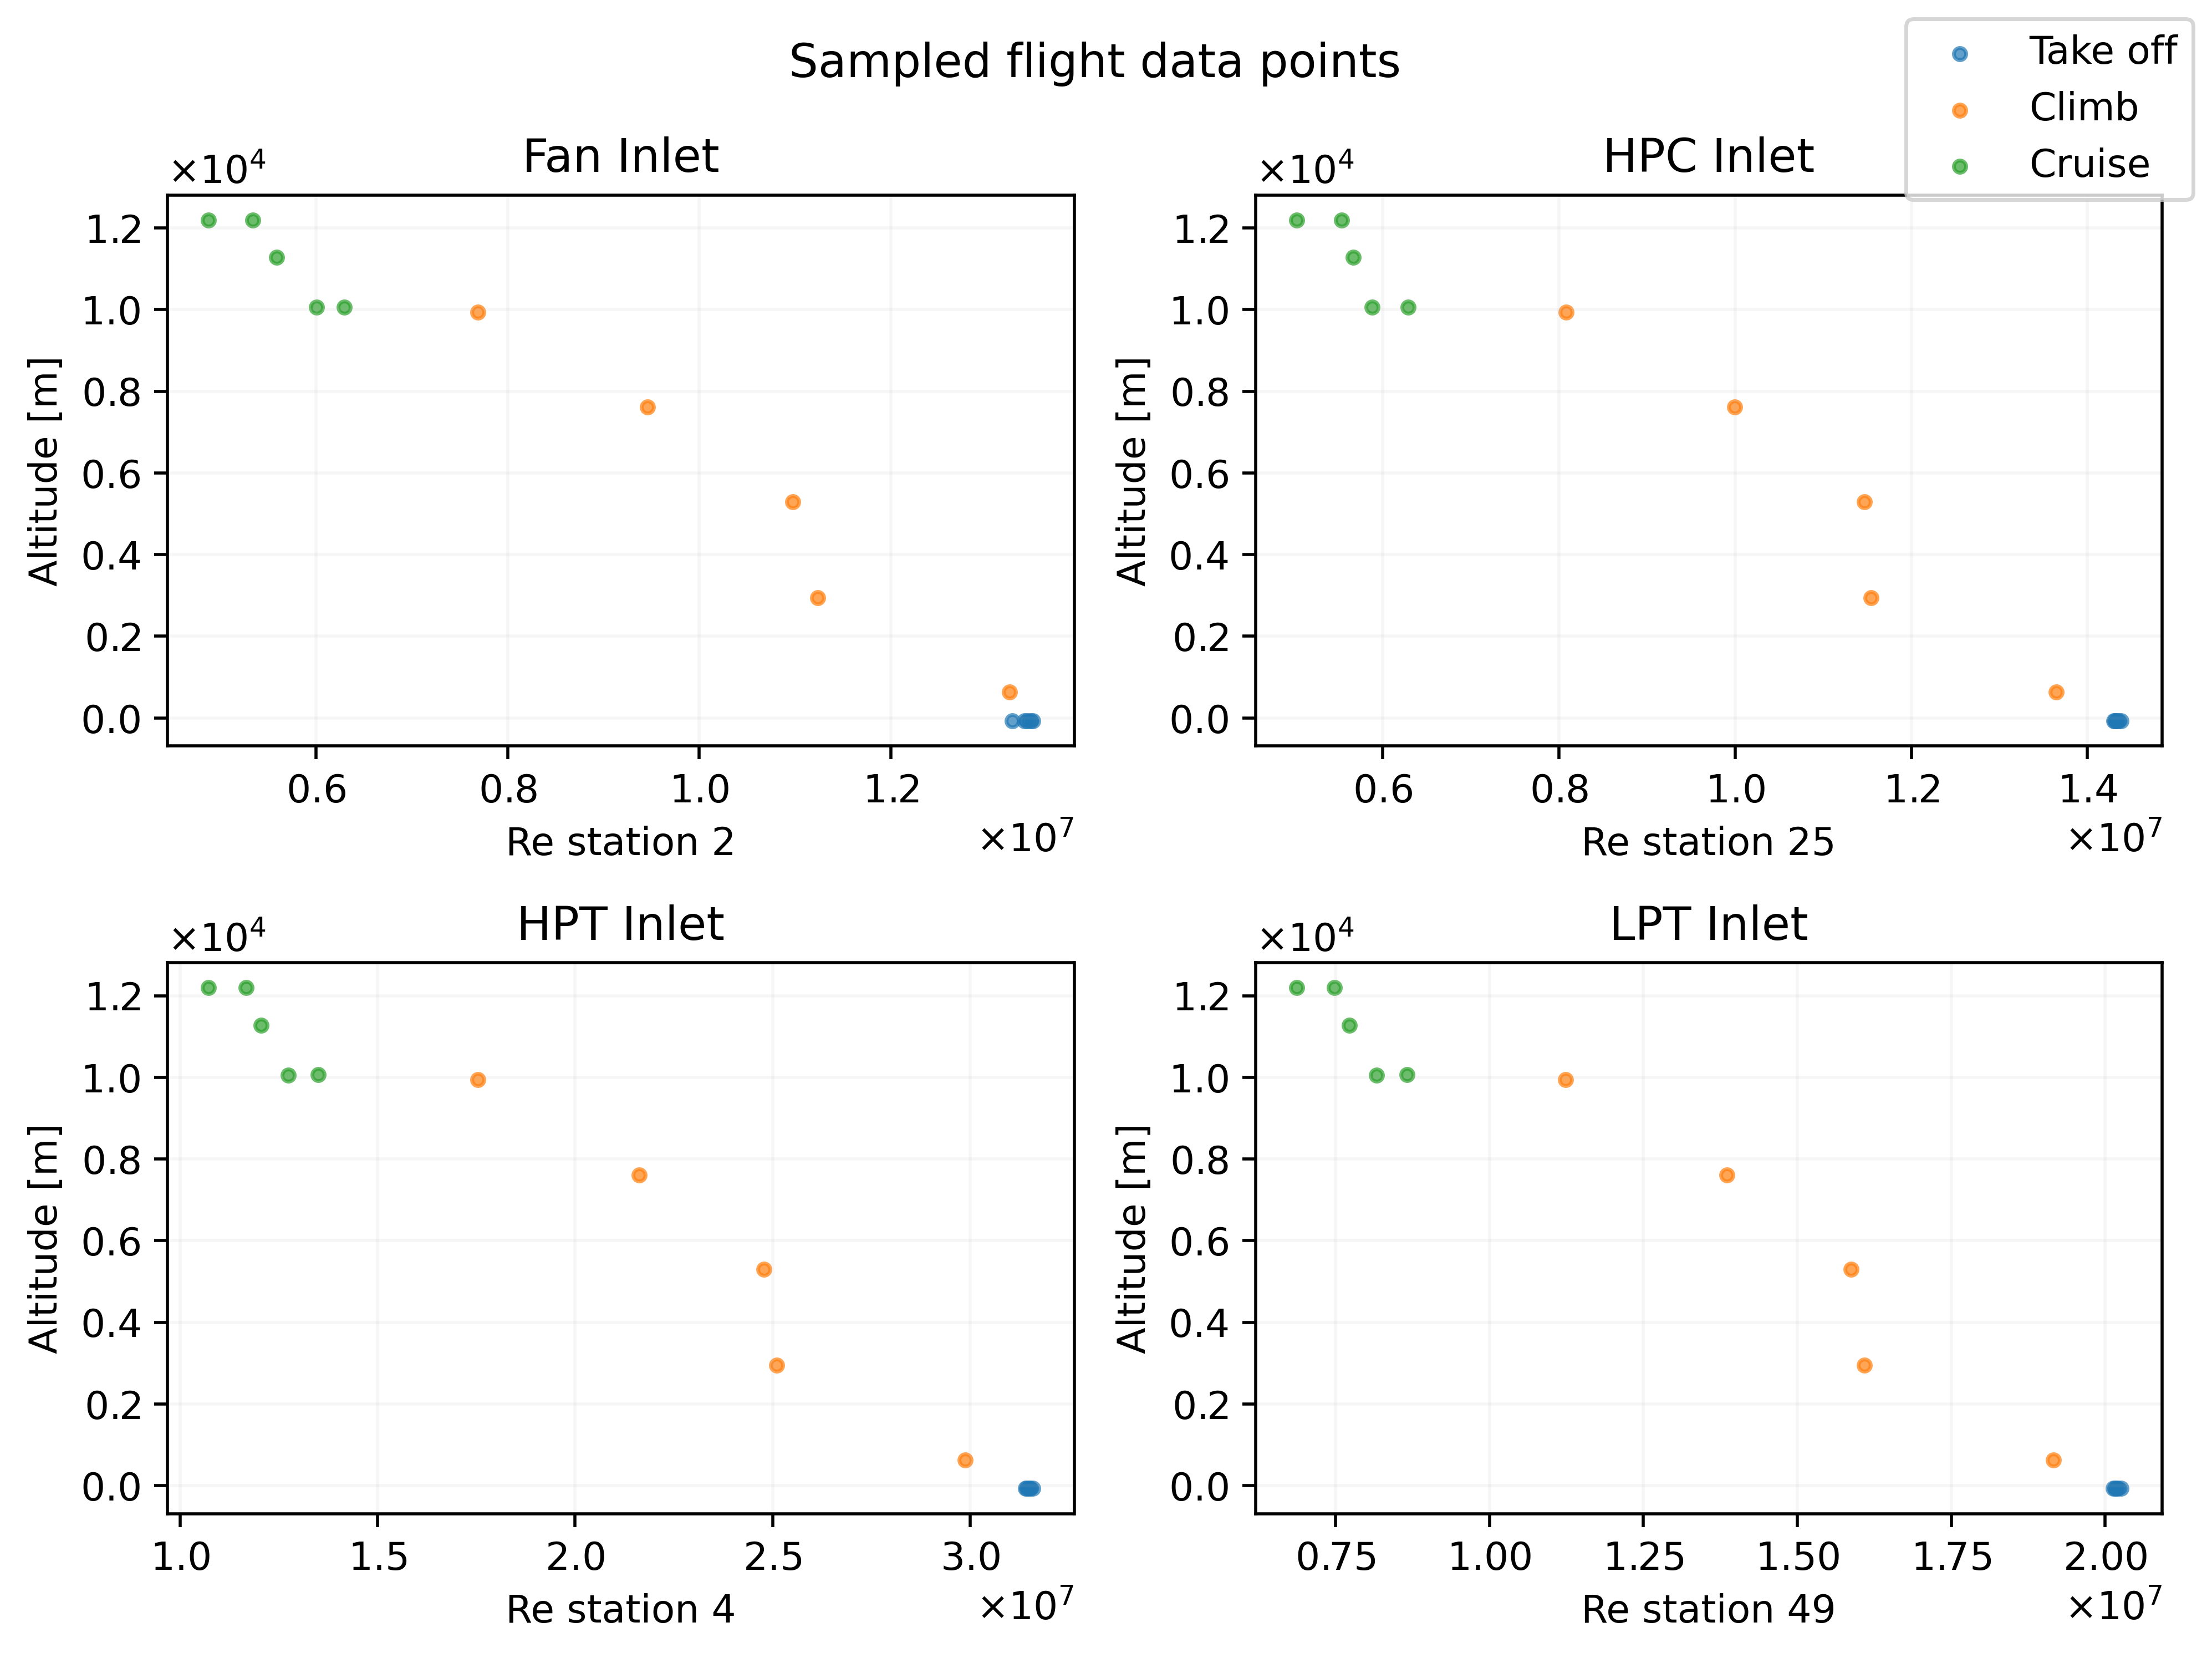

In [48]:
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"   
GEnx_OD, GEnx_OD_true, alt_time, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))

fig_title = 'Sampled flight data points'
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=500)
fig.suptitle(fig_title)


Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = np.array(All_Reynolds).T
alt, time = np.array(alt_time).T
alt = alt * 0.3048

for ax, data, label, title in zip(axes.flat, 
                                 [Re2, Re25, Re4, Re49],
                                 ['Re2', 'Re25', 'Re4', 'Re49'], 
                                 ['Fan Inlet', 'HPC Inlet', 'HPT Inlet', 'LPT Inlet']):

    ax.scatter(x=data[:5], y=alt[:5], s=10, alpha=0.7, label='Take off')
    ax.scatter(x=data[5:10], y=alt[5:10], s=10, alpha=0.7, label='Climb')
    ax.scatter(x=data[10:], y=alt[10:], s=10, alpha=0.7, label='Cruise')
#     ax.plot(data[:5], alt[:5],  label='Take off')
#     ax.plot(data[5:10], alt[5:10], label='Climb')
#     ax.plot(data[10:], alt[10:],  label='Cruise')
    
    ax.set_xlabel(f'Re station {label.strip("Re")}')
    ax.set_ylabel('Altitude [m]')
    ax.grid(True, alpha=0.1)
    ax.set_title(title)

    # Use ScalarFormatter for the y-axis
    x_formatter = ScalarFormatter(useMathText=True)
    x_formatter.set_scientific(True)
    x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis

    y_formatter = ScalarFormatter(useMathText=True)
    y_formatter.set_scientific(True)
    y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis

    ax.xaxis.set_major_formatter(x_formatter)
    ax.yaxis.set_major_formatter(y_formatter)
        
# Adjust spacing between subplots
plt.tight_layout()
fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + fig_title + '.jpeg')
plt.show()
